In [1]:
import pandas as pd
import sqlite3 

In [2]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Получить данные о просмотрах страниц

In [3]:
query = """
    SELECT date(datetime) AS date, COUNT(*) AS views
    FROM pageviews
    WHERE uid LIKE 'user%'
    GROUP BY date(datetime)
"""
views = pd.read_sql(query, connection)
# views

## Получить данные о проверках 

In [4]:
query = """
    SELECT date(timestamp) AS date, COUNT(*) AS checks
    FROM checker
    WHERE uid LIKE 'user%' 
    GROUP BY date(timestamp)
"""
checks = pd.read_sql(query, connection)
# checks

## Получить даты, когда были и просмотры и проверки

In [5]:
merge = pd.merge(views, checks, on='date', how='inner')
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    32 non-null     object
 1   views   32 non-null     int64 
 2   checks  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


## График

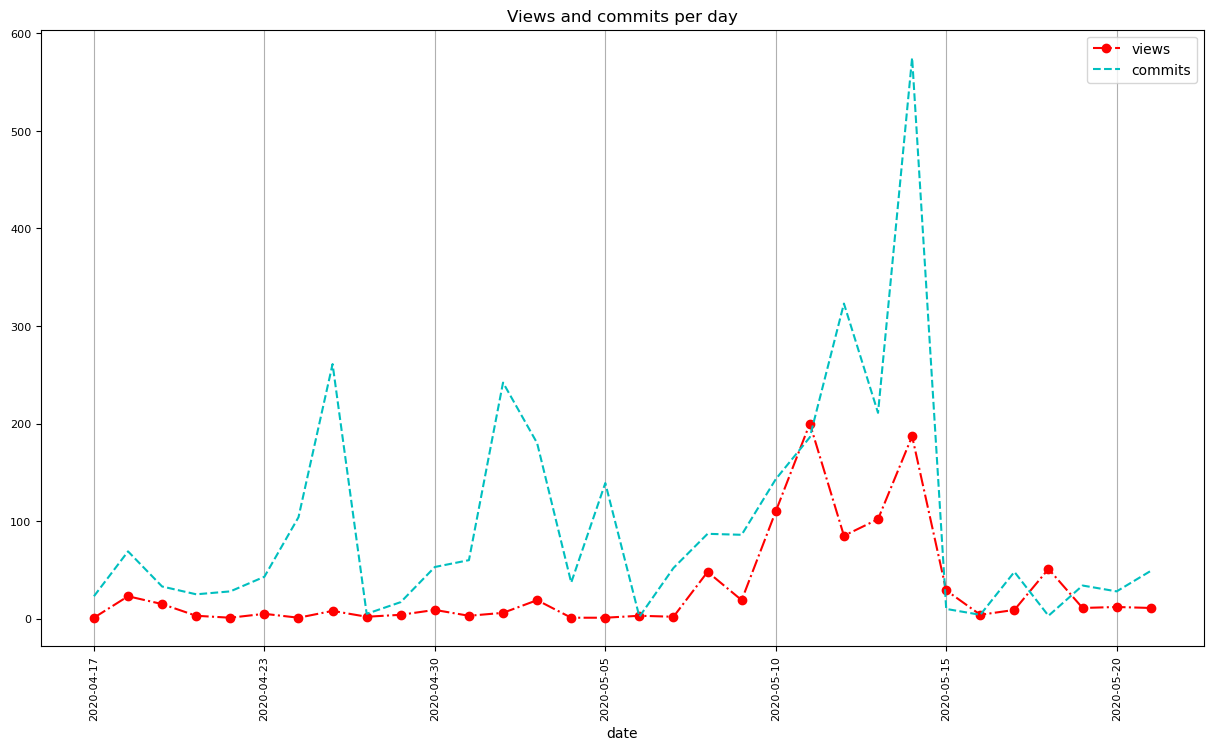

In [6]:
ax = merge.plot(
    x='date', 
    y='views',
    kind='line',
    style='o-.',
    color='r',
    label='views',
    figsize=(15, 8),
    title='Views and commits per day', 
    fontsize = 8,
)

merge.plot(
    x='date',
    y='checks',
    kind='line',
    style='--',
    color='c',
    label='commits',
    ax=ax
)
ax.xaxis.grid(True)
ax.tick_params(axis='x', rotation=90)

## Сколько раз количество просмотров превышало 150?

In [7]:
views_count = merge[merge['views'] > 150].shape[0]
print(f'Ответ: {views_count}')

Ответ: 2


In [8]:
connection.close()